In [9]:
import shap

import pandas as pd
import random
import pickle as pkl

from utilities import knight_data_processing
from utilities import model_training_utils
from utilities import create_summary_statistics_knight_data

import matplotlib.pyplot as plt

### Definition of variables

In [10]:
# Number of runs for each model
N_RUNS = 10

#the number of top contributing clinical features in the clinical model. In the paper, this is equal to 20
N_TOP_FEATURES = 10

# class names in dataframe
RISK_CLASSES = ['risk_label_0', 'risk_label_1', 'risk_label_2', 'risk_label_3', 'risk_label_4']

### Load processed clinical data

In [11]:
df = knight_data_processing.process_KNIGHT_clinical_data(data_path = 'KNIGHT/knight/data/knight.json', 
                                 processed_file_name=None)
df = knight_data_processing.beautify_column_names(df)

In [12]:
df.head()

,Age at nephrectomy,Gender,Age when quit smoking,Chewing tobacco use,Alcohol use,Smoking level,Has smoking history,Radiographic size,Body mass index (BMI),Preoperative eGFR value (ml/min),...,Has mild liver disease,Has moderate to severe liver disease,Has AIDS,adj_therapy_label,risk_label,risk_label_0,risk_label_1,risk_label_2,risk_label_3,risk_label_4
case_id,,,,,,,,,,,,,,,,,,,,,
case_00000,49,0,100.0,0.0,1.0,0,0,2.4,29.47,77.0,...,0,0,0,0.0,2,0,0,1,0,0
case_00001,50,0,33.0,0.0,1.0,1,1,2.2,33.71,67.0,...,0,0,0,0.0,1,0,1,0,0,0
case_00002,74,0,100.0,0.0,0.0,2,1,4.5,28.13,NaN,...,0,0,0,1.0,3,0,0,0,1,0
case_00003,44,1,NaN,0.0,1.0,1,1,3.0,38.69,86.0,...,0,0,0,0.0,1,0,1,0,0,0
case_00004,73,0,55.0,0.0,0.0,1,1,3.0,28.59,NaN,...,0,0,0,0.0,1,0,1,0,0,0


### Split data

In [13]:
x_train, y_train, x_val, y_val = knight_data_processing.get_KNIGHT_data_split(df,
                                                train_path = 'KNIGHT/knight/data/knight_train_set.pkl',
                                                 val_path = 'KNIGHT/knight/data/knight_val_set.pkl',
                                                 splits_file_path = 'splits_final.pkl',
                                                )

Number of patients in train: 240 and val: 60


### KNIGHT descriptive statistics

In [14]:
Train = pd.merge(x_train, y_train, left_index=True, right_index=True)
Val = pd.merge(x_val, y_val, left_index=True, right_index=True)

create_summary_statistics_knight_data.print_table_1([('Train', Train), ('Validation', Val)])

,Train,Validation
No. of patients,240,60
Number of women,99 (41.2),21 (35.0)
Age at nephrectomy (y),58 ± 15,62 ± 9
Most recent body mass index,31.0 ± 6.8,30.2 ± 6.3
Preoperative eGFR value (ml/min),73.9 ± 13.8,74.9 ± 17.3
Smoking history,129 (53.8),34 (56.7)
Myocardial infarction history,10 (4.2),3 (5.0)
Has chronic kidney disease,19 (7.9),5 (8.3)
Outcome/Risk group,,
Adjuvant therapy candidacy,65 (27.1),20 (33.3)


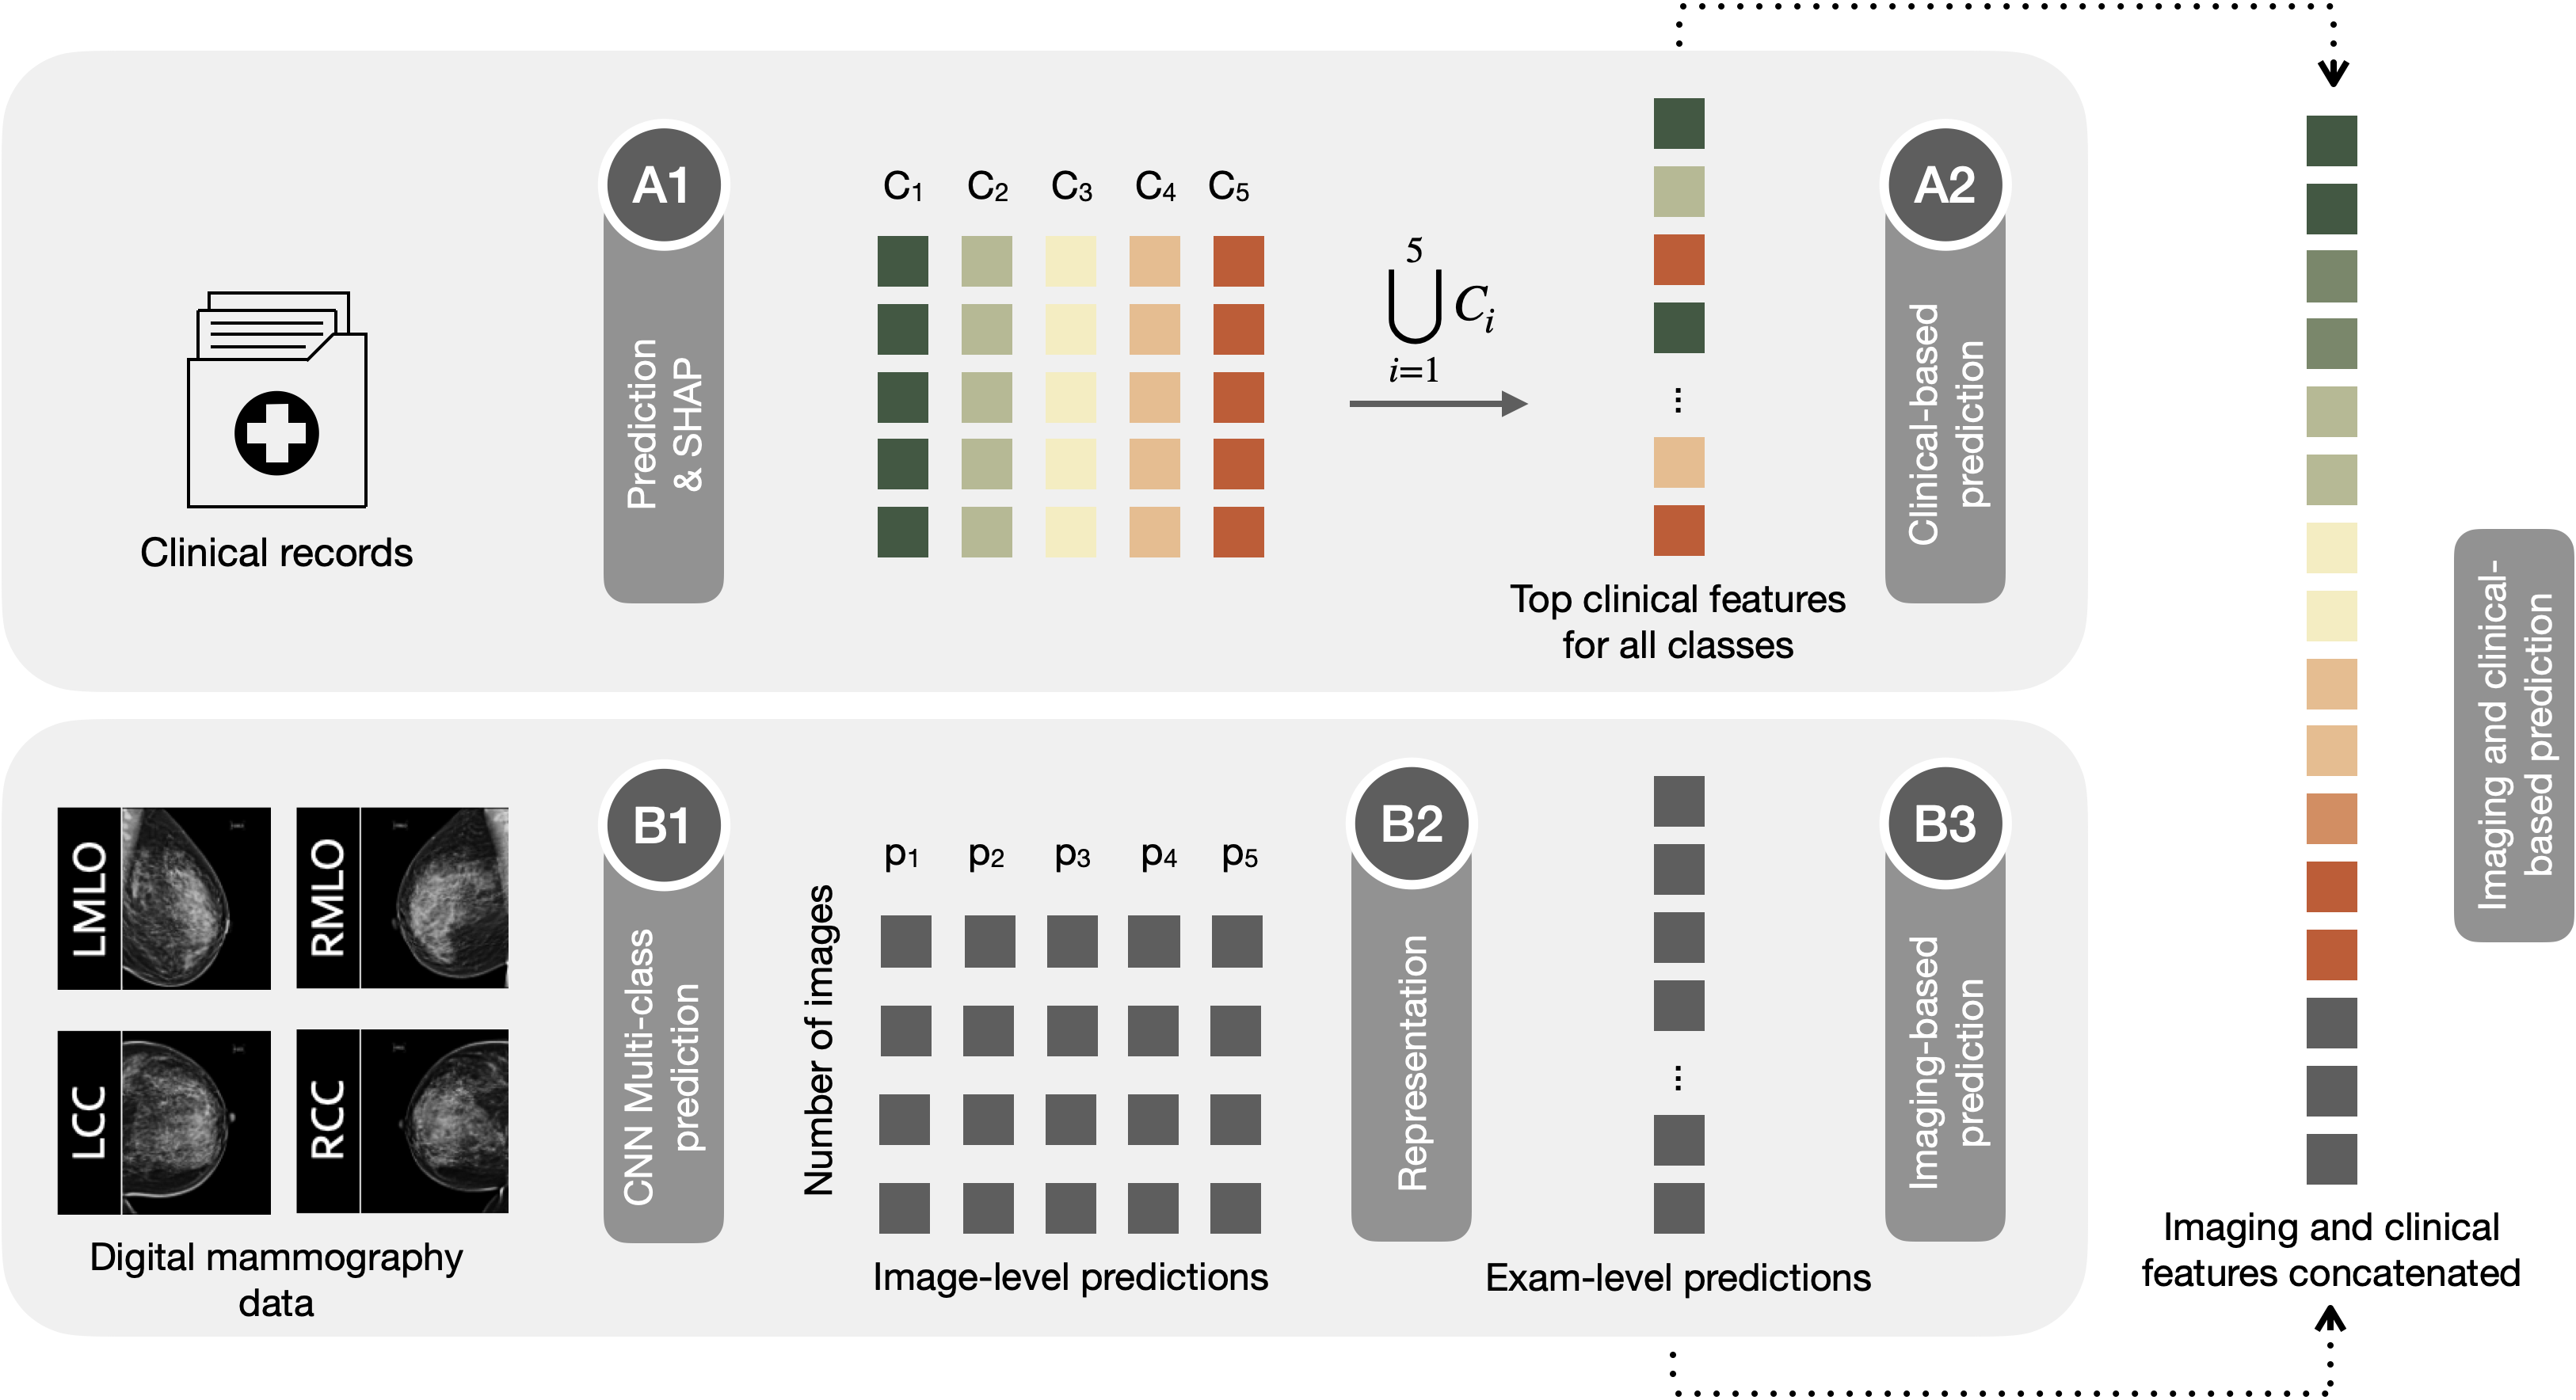

In [15]:
from IPython.display import Image
Image("Fig4.png")

## A1: Train models using all clinical features

In [16]:
for risk_class in RISK_CLASSES:
    model_training_utils.train_model(x_train = x_train, x_val = x_val, y_train = y_train, y_val = y_val,
            feature_set = 'all_clinical_feats', n_iter = N_RUNS, risk_class = risk_class)

**Training models for class risk_label_0 **
1/10

	AUC of model 1: 0.64 [0.26, 0.83]
2/10

	AUC of model 2: 0.65 [0.24, 0.83]
3/10

	AUC of model 3: 0.73 [0.14, 0.78]
4/10

	AUC of model 4: 0.65 [0.10, 0.83]
5/10

	AUC of model 5: 0.60 [0.20, 0.85]
6/10

	AUC of model 6: 0.72 [0.10, 0.75]
7/10

	AUC of model 7: 0.70 [0.15, 0.80]
8/10

	AUC of model 8: 0.65 [0.18, 0.93]
9/10

	AUC of model 9: 0.67 [0.12, 0.81]
10/10

	AUC of model 10: 0.63 [0.22, 0.82]
**Training models for class risk_label_1 **
1/10

	AUC of model 1: 0.80 [0.11, 0.36]
2/10

	AUC of model 2: 0.80 [0.10, 0.34]
3/10

	AUC of model 3: 0.79 [0.11, 0.36]
4/10

	AUC of model 4: 0.81 [0.10, 0.35]
5/10

	AUC of model 5: 0.80 [0.11, 0.36]
6/10

	AUC of model 6: 0.79 [0.12, 0.38]
7/10

	AUC of model 7: 0.80 [0.12, 0.36]
8/10

	AUC of model 8: 0.80 [0.11, 0.36]
9/10

	AUC of model 9: 0.79 [0.12, 0.37]
10/10

	AUC of model 10: 0.81 [0.10, 0.35]
**Training models for class risk_label_2 **
1/10

	AUC of model 1: 0.47 [0.17, 0.55]
2/1

### Plot AUCs

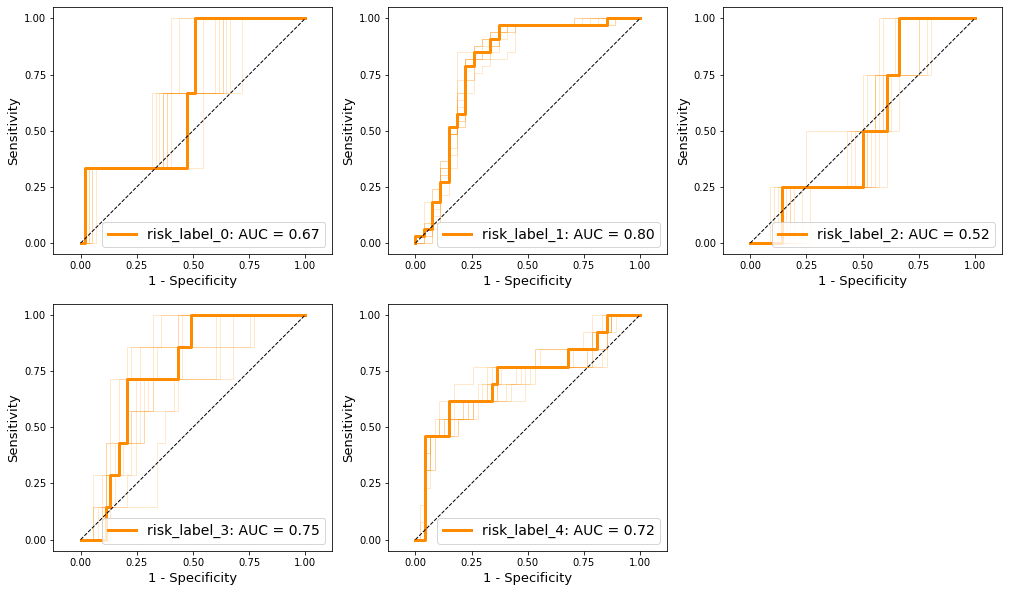

In [17]:
fig, ax = plt.subplots(2, 3)
fig.set_size_inches(17, 10)

model_training_utils.plot_AUC_validation_set(ax[0,0], feature_set = 'all_clinical_feats', risk_class = 'risk_label_0')
model_training_utils.plot_AUC_validation_set(ax[0,1], feature_set = 'all_clinical_feats', risk_class = 'risk_label_1')
model_training_utils.plot_AUC_validation_set(ax[0,2], feature_set = 'all_clinical_feats', risk_class = 'risk_label_2')
model_training_utils.plot_AUC_validation_set(ax[1,0], feature_set = 'all_clinical_feats', risk_class = 'risk_label_3')
model_training_utils.plot_AUC_validation_set(ax[1,1], feature_set = 'all_clinical_feats', risk_class = 'risk_label_4')
fig.delaxes(ax[1,2]) 

### Feature contribution (SHAP analysis)

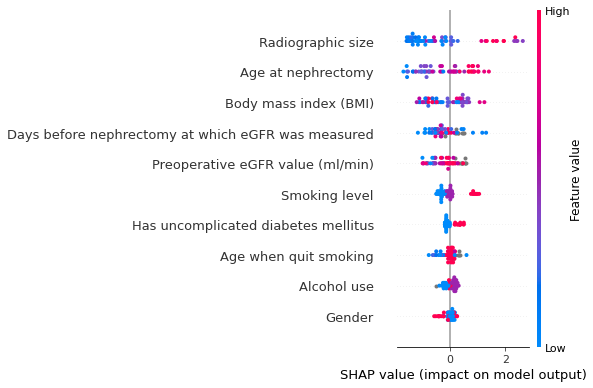

In [18]:
fig, axs = plt.subplots()
fig.set_size_inches(5, 8)

model_training_utils.show_shap_summary_plot (feature_set = 'all_clinical_feats',
                                             risk_class = 'risk_label_3',
                                             model_index = 1, x_val = x_val)

### Find top most contributing clinical features for the prediction of all classes

In [19]:
subset_clinical_feats = model_training_utils.get_feature_importance (risk_classes = RISK_CLASSES,
                                                n_iter = N_RUNS, 
                                                feature_set = 'all_clinical_feats',
                                                n_top_features = N_TOP_FEATURES, 
                                                x_val = x_val)

Most contributing features to the prediction of all classes are:

Preoperative eGFR value (ml/min), Has peripheral vascular disease, Radiographic size, Smoking level, Alcohol use, Age at nephrectomy, Age when quit smoking, Has smoking history, Gender, Body mass index (BMI), Days before nephrectomy at which eGFR was measured, Has uncomplicated diabetes mellitus


## A2: Prediction with subset of clinical features

In [20]:
for risk_class in RISK_CLASSES:
    model_training_utils.train_model(x_train = x_train, x_val = x_val, y_train = y_train, y_val = y_val,
            feature_set = 'subset_clinical_feats', n_iter = N_RUNS, risk_class = risk_class)

**Training models for class risk_label_0 **
1/10

	AUC of model 1: 0.74 [0.26, 0.89]
2/10

	AUC of model 2: 0.68 [0.27, 0.86]
3/10

	AUC of model 3: 0.74 [0.26, 0.89]
4/10

	AUC of model 4: 0.68 [-0.00, 0.84]
5/10

	AUC of model 5: 0.64 [0.30, 0.92]
6/10

	AUC of model 6: 0.67 [0.21, 0.89]
7/10

	AUC of model 7: 0.61 [0.22, 0.84]
8/10

	AUC of model 8: 0.60 [0.20, 0.90]
9/10

	AUC of model 9: 0.59 [0.20, 0.87]
10/10

	AUC of model 10: 0.81 [0.13, 0.80]
**Training models for class risk_label_1 **
1/10

	AUC of model 1: 0.82 [0.09, 0.33]
2/10

	AUC of model 2: 0.78 [0.12, 0.36]
3/10

	AUC of model 3: 0.81 [0.09, 0.34]
4/10

	AUC of model 4: 0.79 [0.10, 0.35]
5/10

	AUC of model 5: 0.79 [0.13, 0.39]
6/10

	AUC of model 6: 0.81 [0.11, 0.36]
7/10

	AUC of model 7: 0.80 [0.11, 0.35]
8/10

	AUC of model 8: 0.82 [0.11, 0.35]
9/10

	AUC of model 9: 0.79 [0.13, 0.39]
10/10

	AUC of model 10: 0.80 [0.12, 0.36]
**Training models for class risk_label_2 **
1/10

	AUC of model 1: 0.52 [0.10, 0.61]
2/

### Plot AUCs

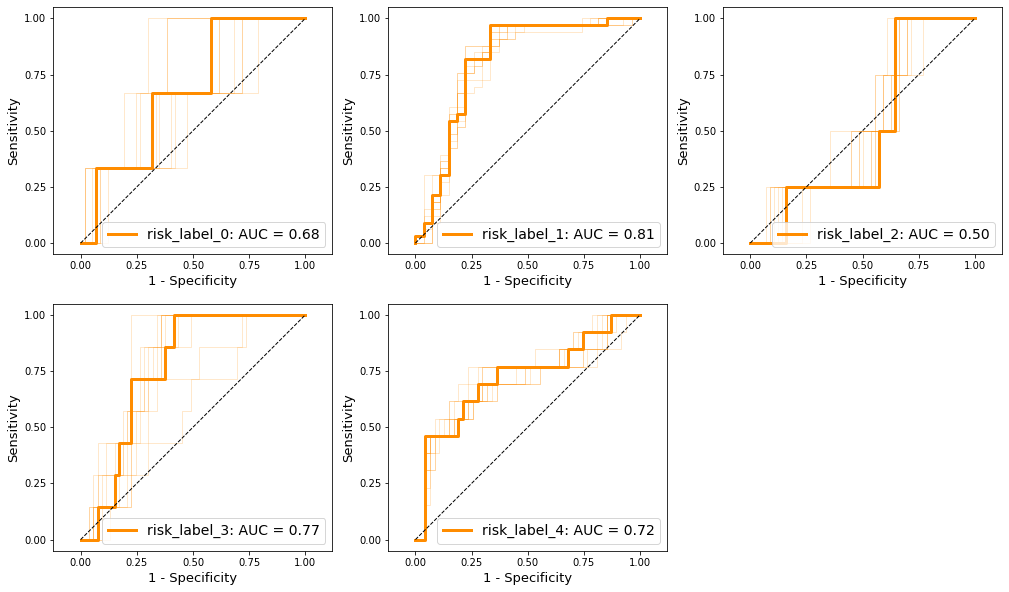

In [21]:
fig, ax = plt.subplots(2, 3)
fig.set_size_inches(17, 10)

model_training_utils.plot_AUC_validation_set(ax[0,0], feature_set = 'subset_clinical_feats', risk_class = 'risk_label_0')
model_training_utils.plot_AUC_validation_set(ax[0,1], feature_set = 'subset_clinical_feats', risk_class = 'risk_label_1')
model_training_utils.plot_AUC_validation_set(ax[0,2], feature_set = 'subset_clinical_feats', risk_class = 'risk_label_2')
model_training_utils.plot_AUC_validation_set(ax[1,0], feature_set = 'subset_clinical_feats', risk_class = 'risk_label_3')
model_training_utils.plot_AUC_validation_set(ax[1,1], feature_set = 'subset_clinical_feats', risk_class = 'risk_label_4')
fig.delaxes(ax[1,2]) 

## B1 and B2: CNN Multi-class prediction and representation from image level to examination level

Step B1 consists of the image-based DL model. The code for running the model is on ```cnn_example.py```, which is written based on the KNIGHT data. After downloading the images and running the script, the files named ```infer_train_task1.csv```, ```infer_validation_task1.csv```, ```infer_train_task2.csv``` and ```infer_validation_task2.csv``` will be located inside ```knight_for_virtual_biopsy_infer``` (these are already provided in the repository). These csv files contain the DL output predictions per image for each class in the KNIGHT dataset. In the original paper, the Virtual Biopsy workflow is based on mammography data, so in addition to the probabilities, we also have information regarding the image view and side (CC, MLO, left, right). We provide one example of how the CNN output file should look like under ```mammography_example_for_virtual_biopsy_infer```, followed by a script that transforms the CNN image predictions into mammography examinations predictions (Step B2).

## B3: Imaging-based predictions

Here we load the output imaging based predictions for the training and validation sets.

In [22]:
cnn_predictions_train = pd.read_csv('knight_for_virtual_biopsy_infer/infer_train_task2.csv')
cnn_predictions_train = cnn_predictions_train[['id', 'pred_classA', 'pred_classB', 'pred_classC', 'pred_classD', 'pred_classE']]
cnn_predictions_train = cnn_predictions_train.rename(columns = {'id': 'case_id'})
cnn_predictions_train = cnn_predictions_train.groupby('case_id').mean()
cnn_predictions_train.head()

,pred_classA,pred_classB,pred_classC,pred_classD,pred_classE
case_id,,,,,
case_00000,0.224467,0.226365,0.139173,0.201201,0.208793
case_00001,0.221760,0.217350,0.138044,0.207671,0.215175
case_00002,0.219246,0.221939,0.140686,0.205948,0.212181
case_00003,0.218534,0.224599,0.139216,0.210137,0.207514
case_00004,0.224514,0.224723,0.138878,0.205068,0.206817


In [23]:
y_train = y_train.drop('case_00160') # The CNN skipped this case due to its different dimension

In [24]:
cnn_predictions_val = pd.read_csv('knight_for_virtual_biopsy_infer/infer_validation_task2.csv')
cnn_predictions_val = cnn_predictions_val[['id', 'pred_classA', 'pred_classB', 'pred_classC', 'pred_classD', 'pred_classE']]
cnn_predictions_val = cnn_predictions_val.rename(columns = {'id': 'case_id'})
cnn_predictions_val = cnn_predictions_val.groupby('case_id').mean()
cnn_predictions_val.head()

,pred_classA,pred_classB,pred_classC,pred_classD,pred_classE
case_id,,,,,
case_00010,0.220807,0.229397,0.135966,0.208570,0.205260
case_00011,0.226724,0.229635,0.134760,0.208411,0.200471
case_00016,0.220067,0.224127,0.136483,0.212661,0.206662
case_00018,0.218820,0.223634,0.133140,0.207880,0.216525
case_00020,0.225254,0.230040,0.132024,0.198706,0.213975


In [25]:
x_train = x_train.merge(cnn_predictions_train, left_index = True, right_index = True)
x_val = x_val.merge(cnn_predictions_val, left_index = True, right_index = True)

In [26]:
for risk_class in RISK_CLASSES:
    model_training_utils.train_model(x_train = x_train, x_val = x_val, y_train = y_train, y_val = y_val,
            feature_set = 'imaging_feats', n_iter = N_RUNS, risk_class = risk_class)

**Training models for class risk_label_0 **
1/10

	AUC of model 1: 0.74 [0.06, 0.93]
2/10

	AUC of model 2: 0.67 [0.20, 0.64]
3/10

	AUC of model 3: 0.64 [0.16, 0.56]
4/10

	AUC of model 4: 0.67 [0.21, 0.72]
5/10

	AUC of model 5: 0.67 [0.07, 0.90]
6/10

	AUC of model 6: 0.67 [0.21, 0.72]
7/10

	AUC of model 7: 0.63 [0.23, 0.64]
8/10

	AUC of model 8: 0.68 [0.08, 0.89]
9/10

	AUC of model 9: 0.67 [0.13, 0.90]
10/10

	AUC of model 10: 0.67 [0.05, 0.74]
**Training models for class risk_label_1 **
1/10

	AUC of model 1: 0.42 [0.39, 0.70]
2/10

	AUC of model 2: 0.41 [0.41, 0.71]
3/10

	AUC of model 3: 0.43 [0.41, 0.71]
4/10

	AUC of model 4: 0.40 [0.41, 0.71]
5/10

	AUC of model 5: 0.41 [0.41, 0.71]
6/10

	AUC of model 6: 0.40 [0.41, 0.71]
7/10

	AUC of model 7: 0.41 [0.38, 0.69]
8/10

	AUC of model 8: 0.41 [0.41, 0.71]
9/10

	AUC of model 9: 0.43 [0.41, 0.70]
10/10

	AUC of model 10: 0.45 [0.37, 0.67]
**Training models for class risk_label_2 **
1/10

	AUC of model 1: 0.28 [0.42, 0.85]
2/1

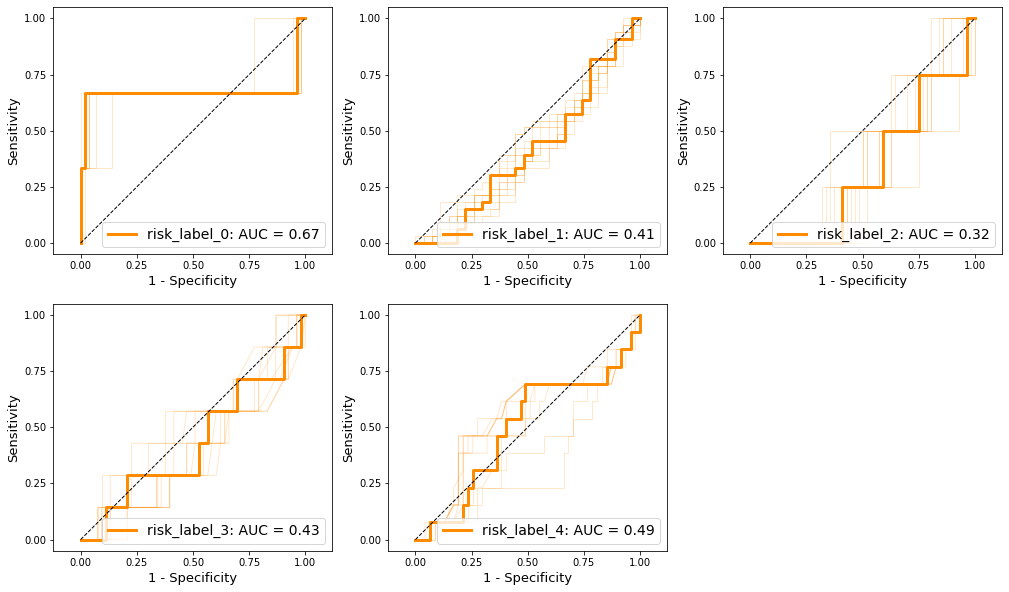

In [27]:
fig, ax = plt.subplots(2, 3)
fig.set_size_inches(17, 10)

model_training_utils.plot_AUC_validation_set(ax[0,0], feature_set = 'imaging_feats', risk_class = 'risk_label_0')
model_training_utils.plot_AUC_validation_set(ax[0,1], feature_set = 'imaging_feats', risk_class = 'risk_label_1')
model_training_utils.plot_AUC_validation_set(ax[0,2], feature_set = 'imaging_feats', risk_class = 'risk_label_2')
model_training_utils.plot_AUC_validation_set(ax[1,0], feature_set = 'imaging_feats', risk_class = 'risk_label_3')
model_training_utils.plot_AUC_validation_set(ax[1,1], feature_set = 'imaging_feats', risk_class = 'risk_label_4')
fig.delaxes(ax[1,2]) 

## Imaging and clinical-based prediction

In [28]:
for risk_class in RISK_CLASSES:
    model_training_utils.train_model(x_train = x_train, x_val = x_val, y_train = y_train, y_val = y_val,
            feature_set = 'both', n_iter = N_RUNS, risk_class = risk_class)

**Training models for class risk_label_0 **
1/10

	AUC of model 1: 0.64 [0.11, 0.96]
2/10

	AUC of model 2: 0.69 [0.31, 0.81]
3/10

	AUC of model 3: 0.70 [0.15, 0.88]
4/10

	AUC of model 4: 0.71 [0.15, 0.93]
5/10

	AUC of model 5: 0.64 [0.08, 0.92]
6/10

	AUC of model 6: 0.67 [0.13, 0.91]
7/10

	AUC of model 7: 0.74 [0.23, 0.91]
8/10

	AUC of model 8: 0.68 [0.13, 0.86]
9/10

	AUC of model 9: 0.64 [0.16, 0.86]
10/10

	AUC of model 10: 0.73 [0.12, 1.00]
**Training models for class risk_label_1 **
1/10

	AUC of model 1: 0.78 [0.13, 0.38]
2/10

	AUC of model 2: 0.75 [0.14, 0.41]
3/10

	AUC of model 3: 0.78 [0.12, 0.38]
4/10

	AUC of model 4: 0.79 [0.12, 0.37]
5/10

	AUC of model 5: 0.74 [0.15, 0.41]
6/10

	AUC of model 6: 0.79 [0.13, 0.38]
7/10

	AUC of model 7: 0.77 [0.14, 0.41]
8/10

	AUC of model 8: 0.78 [0.13, 0.38]
9/10

	AUC of model 9: 0.79 [0.11, 0.36]
10/10

	AUC of model 10: 0.79 [0.12, 0.38]
**Training models for class risk_label_2 **
1/10

	AUC of model 1: 0.25 [0.16, 0.72]
2/1

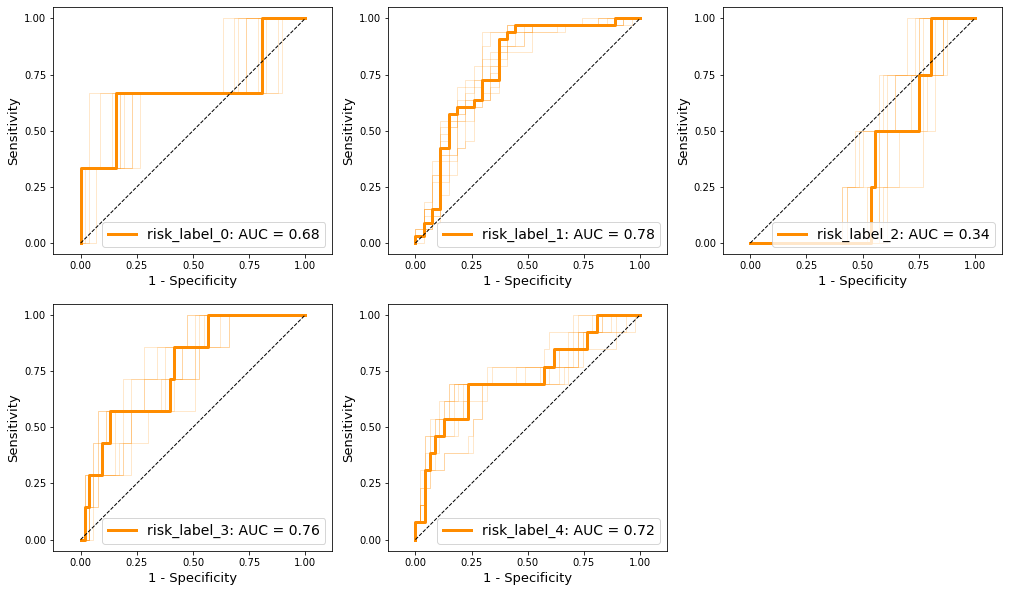

In [29]:
fig, ax = plt.subplots(2, 3)
fig.set_size_inches(17, 10)

model_training_utils.plot_AUC_validation_set(ax[0,0], feature_set = 'both', risk_class = 'risk_label_0')
model_training_utils.plot_AUC_validation_set(ax[0,1], feature_set = 'both', risk_class = 'risk_label_1')
model_training_utils.plot_AUC_validation_set(ax[0,2], feature_set = 'both', risk_class = 'risk_label_2')
model_training_utils.plot_AUC_validation_set(ax[1,0], feature_set = 'both', risk_class = 'risk_label_3')
model_training_utils.plot_AUC_validation_set(ax[1,1], feature_set = 'both', risk_class = 'risk_label_4')
fig.delaxes(ax[1,2]) 